In [1]:
#Install gurobi dependency by uncommenting following line:
!pip install gurobipy numpy pandas

You should consider upgrading via the 'C:\Users\artur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


# A Production Problem

## Problem Description

Beaver Ridge Hot Tubs manufactures and sells two models of hot tubs: the Aqua-Spa and the Hydro-Lux.  Tim, the owner and manager of the company, needs to decide how many of each type of hot tub to produce during his next production cycle.

Tim buys prefabricated fiberglass hot tub shells from a local supplier and adds the pump and tubing to the shells to create his hot tubs.  (This supplier has the capacity to deliver as many hot tub shells as Tim needs.)  Tim installs the same type of pump into both hot tubs.

He will have only 200 pumps available during his next production cycle.  From a manufacturing standpoint, the main difference between the two models of hot tubs is the amount of tubing and labor required.  Each Aqua-Spa requires 9 hours of labor and 12 feet of tubing.  Each Hydro-Lux requires 6 hours of labor and 16 feet of tubing.  Tim expects to have 1,566 production labor hours and 2,880 feet of tubing available during the next production cycle.


Tim earns a profit of \\$ 350 on each Aqua-Spa he sells and $300 on each Hydro-Lux he sells. The question is, how many Aqua-Spas and Hydro-Luxes should Tim produce if he wants to maximize his revenue during the next production cycle?

## Identify the Decision Variables


Let:
- x = the number of Aqua-Spas produced
- y = the number of Hydro-Luxes produced

## Formulate the Objective Function

The objective function has been loosely defined as revenue. We formulate the porblem as a simple linear function of total profit, as the sum of of the sales of both products.
We know that the profit of a Aqua-Spa is \\$ 350 and that that of a Hydro-Lux \\$ 300

- 350 * x + 300 * y

## Formulate the Constraints

We have the following constraints

The producer only has 200 pumps available
- x+y <= 200.

We only have 1566 available labor hours. Each Aqua-Spa requires 9 hours of labor, Each Hydro-Lux requires 6 hours.
- 9 * x + 6 * y <= 1566.

We have only 2,880 feet of tubing available. Each Aqua-Spa requires 12 feet of tubing, Each Hydro-Lux requires 16 feet.
- 12 * x + 16 * y <= 2880.

Text(0, 0.5, '$y$')

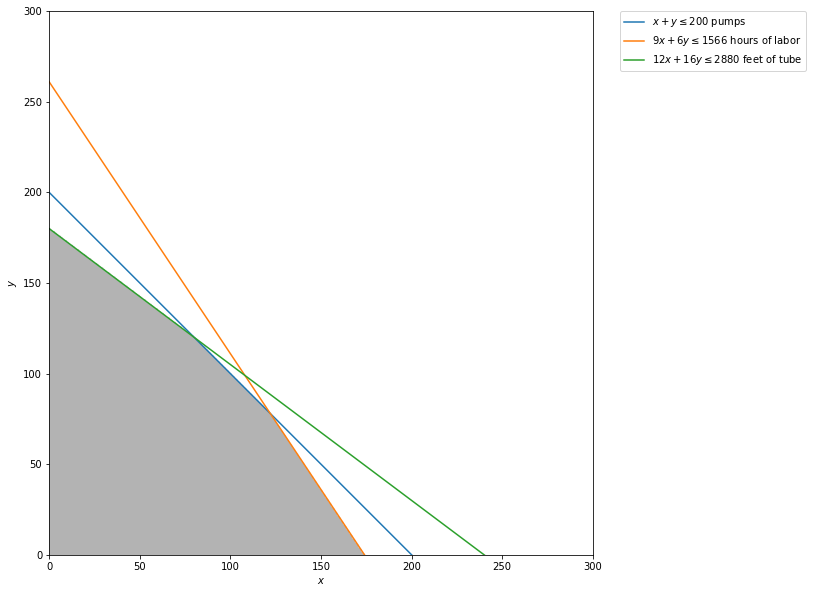

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

d = np.linspace(0,250,300)
x,y = np.meshgrid(d,d)
#Plot fei
plt.imshow( ((y<=200-(1*x)) & (6*y<=1566-(x*9)) & (16*y<=2880-(x*12))).astype(int) ,
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

x = np.linspace(0, 250, 2000)

y1 = 200 - (1*x) #pump constraint
y2 = (1566 - (9*x))/6 #labor constraint
y3 = (2880 - (12*x))/16 #tube constraint

plt.plot(x,y1, label='$x + y \leq 200$ pumps') # maximum 200 pumps
plt.plot(x,y2, label='$9x + 6y \leq 1566$ hours of labor') # maximum 1566 labor hours
plt.plot(x,y3, label='$12x + 16y \leq 2880$ feet of tube') # maximum 2880 feet of tube

plt.xlim(0,300)
plt.ylim(0,300)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')


## Gurobi Model

First, start your Python file with a heading and the import Gurubi statement:

In [2]:
# import gurobi library
import gurobipy as gp         #Gurobi Python interface
from gurobipy import GRB      #Import as shortcut to avoid writing GP.grb
from itertools import product


The model variable is created using the Model function, with the usual input parameters.

In [3]:
#Define model
m = gp.Model('Hot_Tub')

Restricted license - for non-production use only - expires 2024-10-28


Initialize the decision variables. We set a constraint for non-negativity using the lb parameter

In [4]:
# Decision variables
x = m.addVar(vtype=GRB.CONTINUOUS, lb=0, name='AQUA_SPA')
y = m.addVar(vtype=GRB.CONTINUOUS, lb=0, name='HYDRO_LUX')

Add the objective function to the model, we choose to maximize the objective function

In [5]:
# The objective is to maximize the profit
m.setObjective(350*x+300*y,GRB.MAXIMIZE)

Add the constraints to the model

In [6]:
# Pump constraint
m.addConstr(x+y<=200,'PUMP_LIMIT')
# Tubing Constraint
m.addConstr(12*x+16*y<=2880,'TUBING_LIMIT')
# Labor Constraint
m.addConstr(9*x+6*y<=1566,'LABOR_LIMIT')

<gurobi.Constr *Awaiting Model Update*>

Write the model specifiction to a text file for possible evalation.

In [7]:
# save model for inspection
m.write('HOTTUBS.lp')

In [8]:
# Solve the problem by running optimization engine
m.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 7 4800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 3 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x608dce1c
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e+02, 4e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 3e+03]
Presolve time: 0.01s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6250000e+32   4.687500e+30   1.625000e+02      0s
       2    6.6100000e+04   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  6.610000000e+04


The solution by the model is optimal, you can see that Gurobi reports to have solved the problem.

In [10]:
#Print optimal objective value
print(f"objective: {m.objVal}")

objective: 66100.0


The optimal product-mix reaches a profit of \$ 66,100 dollar.

We reach the maximal number of pumps and labor hours. Our solution is 168 feet of tube below what was available.

In [12]:
#print LHS
for constr in m.getConstrs():
  print(f'{constr.ConstrName} LHS {m.getRow(constr).getValue()}')

PUMP_LIMIT LHS 200.0
TUBING_LIMIT LHS 2712.0
LABOR_LIMIT LHS 1566.0


In [11]:
# display optimal values of decision variables
for var in m.getVars():
    if abs(var.x) > 1e-6:
        print("{0}: {1}".format(var.varName, var.x))

AQUA_SPA: 122.0
HYDRO_LUX: 78.0


The optimal product-mix is 122 units of Aqua-Spas and 78 Hydro-luxes.